In [1]:
import pandas as pd
import numpy as np

In [2]:
DB_PATH = "Simulation/FSN_Data_5k.db"

In [3]:
from NetEmbs import *

## Upload data as Journal Entries

In [4]:
data = upload_data(DB_PATH, limit=100)

In [5]:
d = data_preprocessing(data)
d.head(2)

,ID,Signature,FA_Name,Credit,Debit,Name,Value,amount,flow
0,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",FixedAssets,0.000000,1.0,FixedAssets_11,52.184404,52.184404,inflow
1,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",NoisyLeftFA_kbfq,0.000406,0.0,NoisyLeftFA_kbfq_11,-0.021187,0.021187,outflow


### Construct FSN object

In [6]:
fsn = FSN()
fsn.build(d, left_title="FA_Name")

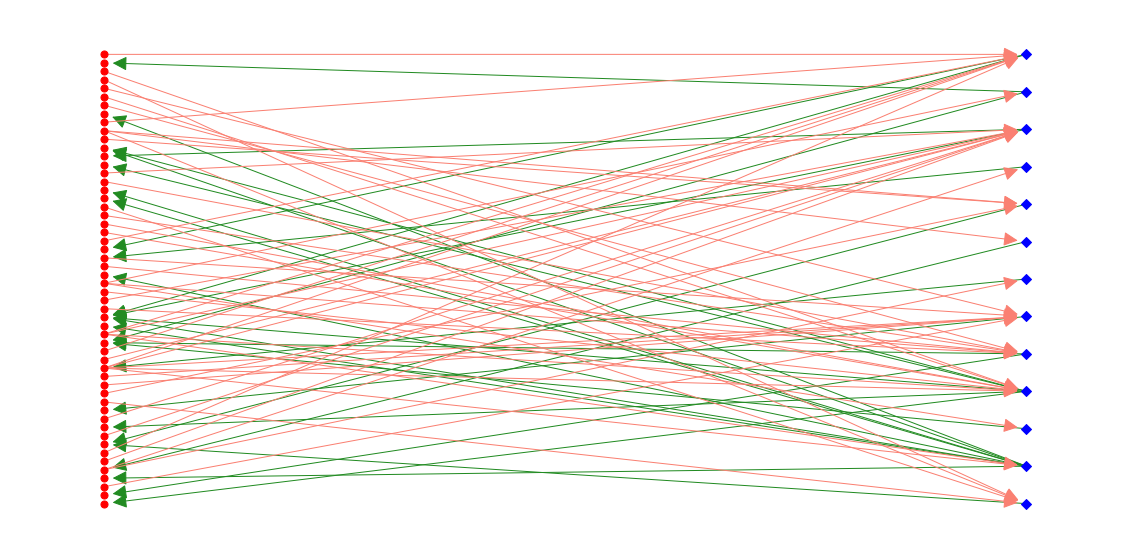

In [8]:
set_font()
draw_fsn(fsn, add_node_labels=False)